# Linear Systems and Regression

In [1]:
using LinearAlgebra

## Linear Systems

One of the most common uses of matrices is for solving linear systems of equations. Julia uses the backslash operator `\` for this:

In [2]:
A = [1 2; 3 4]
b = [5,1]
x = A \ b         # Solve Ax = b for x
A*x == b        # Confirm solution is correct

true

One way to view the syntax `A\b` is that it multiplies by `A`-inverse from the left, but using much more efficient and accurate algorithms.

For systems with many right-hand side vectors `b`, the `\` operator also works with matrices:

In [3]:
B = [5 7; 1 -3]
X = A \ B          # Solve for two RHS vectors
A*X == B

false

The algorithm used by the `\` operator is typically Gaussian elimination, but the details are quite complex depending on the type of matrices involved. Due to the high cost of general Gaussian elimination, it can make a big difference if you use a specialized matrix type:

In [4]:
n = 2000
T = SymTridiagonal(2ones(n), -ones(n))     # n-by-n symmetric tridiagonal

for rep = 1:3 @time T \ randn(n) end       # Very fast since T is a SymTridiagonal
Tfull = Matrix(T)                          # Convert T to a full 2D array
for rep = 1:3 @time Tfull \ randn(n) end   # Now \ is magnitudes slower

  0.452861 seconds (870.39 k allocations: 43.525 MiB, 3.84% gc time, 99.95% compilation time)
  0.000072 seconds (4 allocations: 63.000 KiB)
  0.000072 seconds (4 allocations: 63.000 KiB)
  0.738877 seconds (635.83 k allocations: 63.447 MiB, 4.75% gc time, 52.17% compilation time)
  0.313166 seconds (5 allocations: 30.564 MiB)
  0.402282 seconds (5 allocations: 30.564 MiB, 22.05% gc time)


The matrix `A` in `A\b` can also be rectangular, in which case a minimum-norm least squares solution is computed.

## Linear regression

Suppose you want to approximate a set of $n$ points $(x_i,y_i)$, $i=1,\ldots,n$, by a straight line. The *least squares approximation* $y=a + bx$ is given by the least-squares solution of the following over-determined system:

$$
\begin{pmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{pmatrix}
\begin{pmatrix}
a \\ b
\end{pmatrix}=
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}
$$

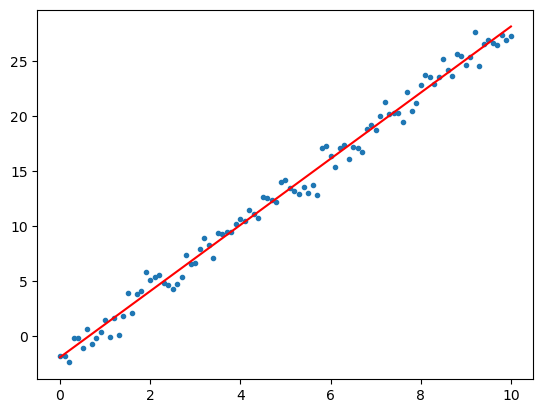

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/mfranco/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


In [5]:
x = 0:0.1:10
n = length(x)
y = 3x .- 2 + randn(n)     # Example data: straight line with noise

A = [ones(n) x]            # LHS
ab = A \ y                 # Least-squares solution

using PyPlot
xplot = 0:10;
yplot = @. ab[1] + ab[2] * xplot
plot(x,y,".")
plot(xplot, yplot, "r");